### 將Excel檔按不同主題/維度去分割，並自動另存輸出

following content first written in 2022.Mar.<br>

 - 說明:
 1. 這邊所輸入的維度標記完成之檔案是針對罷工站台或是站台上的維度標記（分析實驗室）之輸出格式做撰寫
 2. 維度部分只要帶有1、0判斷的欄位都可做使用

#### 前置作業

In [1]:
#設定環境
#-*-coding:UTF-8-*- 

import os, time, glob, socket

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))

#設定自動存檔時間
%autosave 60

【日期時間】2022/06/23 10:42:26
【工作目錄】C:\Users\mingyanlin\OneDrive\文件\02. Python Scripts
【主機名稱】nb543 (10.10.20.33)


Autosaving every 60 seconds


In [2]:
#安裝pandas套件

!pip install tqdm
import pandas as pd
from tqdm.notebook import trange, tqdm #可以出現進度條的模組
from time import sleep

In [3]:
#匯入excel檔
##要自行更換路徑

import warnings

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df = pd.read_excel(r"C:\Users\mingyanlin\OneDrive\文件\01. Task\01. eLand\03. Analysis Reports\【Fubon Securities 富邦證券】季報\2022 Q2\DimTag_Result_22Q2fbs季報.xlsx", 
                       engine="openpyxl")

In [5]:
#檢視資料狀況

df.head()

,監測主題,標題,內容,來源,來源網站,主文/回文,發佈時間,討論串總則數,點閱數/按讚數,分享/轉貼數/評級,...,網站作者,線上開戶,台股,定期定額,海外股票,基金,信用,期權,其他商品,原始連結
0,元大證券,00905存股季配領息高殖利率低本益比ETF息收價差兩頭賺特選Smart量化多因子抗跌小資...,追蹤「特選Smart多因子指數」<BR>平均年化報酬率逾18%<BR>除了打敗大盤(17%...,社群網站,Youtube關鍵字搜尋 > 關鍵字搜尋,回文1,2022-04-05 19:50:34,6,443,0,...,Youtube關鍵字搜尋_我們這一家,0,0,0,0,0,0,0,1,http://www.youtube.com/watch?v=7HEsbbERnOQ
1,元大證券,我都忘記有永豐的股票記得當時才10塊錢,Winnie Hsiao永豐證券是持通知單都可以換（通知單上面有寫可以換的地方）；元大證券...,社群網站,Facebook粉絲團 > 不敗教主-陳重銘,回文135,2022-04-29 18:55:12,154,0,0,...,Facebook粉絲團_無作者資訊,0,0,0,0,0,0,0,0,https://www.facebook.com/536526377836742_99051...
2,元大證券,惜福| 2022-04-12 22:22 |在藥華藥(6446)的爆料,序號4發言日期111/04/12發言時間22:06:51發言人林國鐘發言人職稱執行長發言人...,新聞,CMoney 追訊 > 熱門爆料,回文1,2022-04-12 22:33:00,1,6,0,...,CMoney 追訊_惜福,0,0,1,0,1,0,0,1,https://www.cmoney.tw/forum/article/144226976
3,元大證券,百變金融女王| 2022-04-15 01:01 |在合庫金(5880)的爆料,隨便買、yang 、星星、hst 、阿玲玲、笑臉a 、信壽郎財務自由、飄飄、johncf ...,新聞,CMoney 追訊 > 熱門爆料,回文3,2022-04-15 01:35:47,3,545,0,...,CMoney 追訊_百變金融女王,0,0,0,0,0,0,0,1,https://www.cmoney.tw/forum/article/144287744
4,元大證券,台股打工族之二叔操盤| 2022-04-30 19:19 |在八貫(1342)的爆料,證期局：4/29晶焱現增等預計申報生效案件彙總表回應(0)人氣(112)收藏(0)2022...,新聞,CMoney 追訊 > 熱門爆料,回文1,2022-04-30 19:18:18,1,32,0,...,CMoney 追訊_台股打工族之二叔操盤,0,1,0,0,0,0,0,0,https://www.cmoney.tw/forum/article/144718914


In [4]:
#預先設定後續批次輸出的路徑，請替換成後續想要迴圈輸出的地方

path = "C:/Users/mingyanlin/OneDrive/文件/01. Task/01. eLand/03. Analysis Reports/【Fubon Securities 富邦證券】季報/2022 Q2/Dimtag/"

#### 1、按「主題」匯出

In [6]:
#建立一個主題list
##直接把所有文字複製貼進""中

brands = "富邦證券	國泰證券	永豐金證券	元大證券	凱基證券	日盛證券"
brands = brands.split("\t")
print(brands)

['富邦證券', '國泰證券', '永豐金證券', '元大證券', '凱基證券', '日盛證券']


In [17]:
#迴圈輸出檔案

for i in tqdm(brands):
    newpath = path + str(i) + '.xlsx'
    df_by_brand = df[df["監測主題"] == i]
    df_by_brand.to_excel(newpath, index=False)
    sleep(0.5)

  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#如果出現urls的錯誤，可改用此code

for i in tqdm(brands):
    newpath = path + str(i) + '.xlsx'
    df_by_brand = df[df["監測主題"] == i]
    with pd.ExcelWriter(newpath, engine='xlsxwriter', engine_kwargs={'options': {'strings_to_numbers': True, 'strings_to_urls' : False}}) as writer:
        df_by_brand.to_excel(writer, index=False)
    sleep(0.5)

#### 2、按「維度」命中匯出

In [7]:
#建立一個維度list
##直接把所有文字複製貼進""中
###接著用空行"\t"去split這一段字串

dms = "線上開戶	台股	定期定額	海外股票	基金	信用	期權	其他商品"
dms = dms.split("\t")
print(dms)

['線上開戶', '台股', '定期定額', '海外股票', '基金', '信用', '期權', '其他商品']


In [7]:
#迴圈輸出檔案

for i in tqdm(dms):
    newpath = path + "【" + str(i) + "】" + '維度標記.xlsx'
    df_by_dms = df[df[i] == 1]
    df_by_dms.to_excel(newpath, index=False)
    sleep(0.5)

  0%|          | 0/8 [00:00<?, ?it/s]

NameError: name 'path' is not defined

In [12]:
#如果出現urls的錯誤，可改用此code

for i in tqdm(dms):
    newpath = path + "【" + str(i) + "】" + '維度標記.xlsx'
    df_by_dms = df[df[i] == 1]
    with pd.ExcelWriter(newpath, engine='openpyxl',
                        engine_kwargs={"options":{'strings_to_numbers': True, 'strings_to_urls' : False}}) as writer:
        df_by_dms.to_excel(writer, index=False)
    sleep(0.5)

  0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
#直接迴圈輸出每主題x每維度之數值

DimDic = {}

for i in tqdm(brands):
    for k in tqdm(dms):
        DimDic[i+"-"+k] = df[df.監測主題 == i][k].sum()

for m in DimDic.items():
    print(m)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

('富邦證券-線上開戶', 232)
('富邦證券-台股', 3125)
('富邦證券-定期定額', 887)
('富邦證券-海外股票', 2521)
('富邦證券-基金', 1359)
('富邦證券-信用', 300)
('富邦證券-期權', 1514)
('富邦證券-其他商品', 1893)
('國泰證券-線上開戶', 315)
('國泰證券-台股', 4887)
('國泰證券-定期定額', 2657)
('國泰證券-海外股票', 2646)
('國泰證券-基金', 1184)
('國泰證券-信用', 259)
('國泰證券-期權', 1305)
('國泰證券-其他商品', 1747)
('永豐金證券-線上開戶', 517)
('永豐金證券-台股', 2226)
('永豐金證券-定期定額', 1042)
('永豐金證券-海外股票', 1626)
('永豐金證券-基金', 488)
('永豐金證券-信用', 252)
('永豐金證券-期權', 643)
('永豐金證券-其他商品', 696)
('元大證券-線上開戶', 172)
('元大證券-台股', 3690)
('元大證券-定期定額', 1387)
('元大證券-海外股票', 1524)
('元大證券-基金', 816)
('元大證券-信用', 368)
('元大證券-期權', 1237)
('元大證券-其他商品', 1213)
('凱基證券-線上開戶', 188)
('凱基證券-台股', 806)
('凱基證券-定期定額', 393)
('凱基證券-海外股票', 753)
('凱基證券-基金', 512)
('凱基證券-信用', 180)
('凱基證券-期權', 600)
('凱基證券-其他商品', 595)
('日盛證券-線上開戶', 55)
('日盛證券-台股', 137)
('日盛證券-定期定額', 114)
('日盛證券-海外股票', 251)
('日盛證券-基金', 307)
('日盛證券-信用', 102)
('日盛證券-期權', 98)
('日盛證券-其他商品', 224)


In [23]:
#直接迴圈輸出每維度x每主題之數值

DimDic = {}

for i in tqdm(dms):
    for k in tqdm(brands):
        DimDic[i+"-"+k] = df[df.監測主題 == k][i].sum()

for m in DimDic.items():
    print(m)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

('線上開戶-富邦證券', 232)
('線上開戶-國泰證券', 315)
('線上開戶-永豐金證券', 517)
('線上開戶-元大證券', 172)
('線上開戶-凱基證券', 188)
('線上開戶-日盛證券', 55)
('台股-富邦證券', 3125)
('台股-國泰證券', 4887)
('台股-永豐金證券', 2226)
('台股-元大證券', 3690)
('台股-凱基證券', 806)
('台股-日盛證券', 137)
('定期定額-富邦證券', 887)
('定期定額-國泰證券', 2657)
('定期定額-永豐金證券', 1042)
('定期定額-元大證券', 1387)
('定期定額-凱基證券', 393)
('定期定額-日盛證券', 114)
('海外股票-富邦證券', 2521)
('海外股票-國泰證券', 2646)
('海外股票-永豐金證券', 1626)
('海外股票-元大證券', 1524)
('海外股票-凱基證券', 753)
('海外股票-日盛證券', 251)
('基金-富邦證券', 1359)
('基金-國泰證券', 1184)
('基金-永豐金證券', 488)
('基金-元大證券', 816)
('基金-凱基證券', 512)
('基金-日盛證券', 307)
('信用-富邦證券', 300)
('信用-國泰證券', 259)
('信用-永豐金證券', 252)
('信用-元大證券', 368)
('信用-凱基證券', 180)
('信用-日盛證券', 102)
('期權-富邦證券', 1514)
('期權-國泰證券', 1305)
('期權-永豐金證券', 643)
('期權-元大證券', 1237)
('期權-凱基證券', 600)
('期權-日盛證券', 98)
('其他商品-富邦證券', 1893)
('其他商品-國泰證券', 1747)
('其他商品-永豐金證券', 696)
('其他商品-元大證券', 1213)
('其他商品-凱基證券', 595)
('其他商品-日盛證券', 224)


In [21]:
DimDic = {}

for i in tqdm(brands):
    DimDic[i] = df[df.監測主題 == i]["台股"].sum() / 81
    
for m in DimDic.items():
    print(m)

  0%|          | 0/6 [00:00<?, ?it/s]

('富邦證券', 38.58024691358025)
('國泰證券', 60.333333333333336)
('永豐金證券', 27.48148148148148)
('元大證券', 45.55555555555556)
('凱基證券', 9.950617283950617)
('日盛證券', 1.691358024691358)


In [22]:
DimDic = {}

for i in tqdm(brands):
    DimDic[i] = df[df.監測主題 == i]["台股"].sum()
    
for m in DimDic.items():
    print(m)

  0%|          | 0/6 [00:00<?, ?it/s]

('富邦證券', 3125)
('國泰證券', 4887)
('永豐金證券', 2226)
('元大證券', 3690)
('凱基證券', 806)
('日盛證券', 137)


#### 3、圖表測試區

In [15]:
#安裝套件

!pip install matplotlib
import matplotlib.pyplot as plt

In [16]:
#查看現有安裝字體

import matplotlib.font_manager
 
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)

Agency FB
Agency FB
Agency FB
Agency FB
Algerian
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Arial Rounded MT Bold
Bahnschrift
Bahnschrift
Baskerville Old Face
Baskerville Old Face
Bauhaus 93
Bauhaus 93
Bell MT
Bell MT
Bell MT
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Berlin Sans FB Demi
Bernard MT Condensed
Bernard MT Condensed
Blackadder ITC
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symb

In [17]:
#指定其中一個字型做繪製

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [ ]:
#如果繪製直方圖之前要先做一些條件篩選，可用此段

ds = (df["來源"] == "新聞") & (df["主文/回文"] != "主文")

##確定條件篩選後之資料正確與否

ds = df[ds]
ds.head()

  0%|          | 0/6 [00:00<?, ?it/s]

('富邦證券', 3125)
('國泰證券', 4887)
('永豐金證券', 2226)
('元大證券', 3690)
('凱基證券', 806)
('日盛證券', 137)


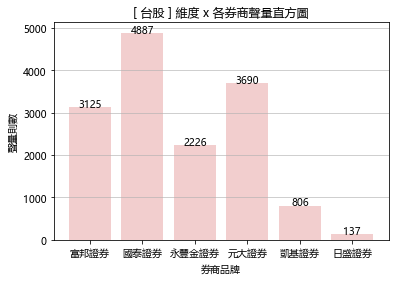

In [20]:
#繪製維度聲量直方圖

DimDic = {}

for i in tqdm(brands):
    DimDic[i] = df[df.監測主題 == i]["台股"].sum()
    
for m in DimDic.items():
    print(m)
    
xx = list(DimDic.keys())
yy = list(DimDic.values())

plt1 = plt.bar(xx, yy, alpha=1, color='#f2cece')
#alpha是設定透明度0~1；color可以指定顏色進去

plt.title("[ "+"台股"+" ]"+" 維度 x 各券商聲量直方圖")
plt.xlabel("券商品牌")
plt.ylabel("聲量則數")
plt.grid(axis='y', alpha=0.75)

for x,y in enumerate(yy):
    plt.text(x,y,'%s'%y,ha='center')

plt.show()